# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset. 

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


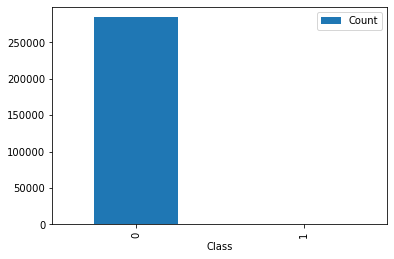

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

Using `Class` for the y values (target feature)

In [9]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [11]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Decision Tree Model

### Train the Model

In [12]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel

DecisionTreeClassifier()

In [13]:
decisionTreeModel.fit(X_train_scaled, y_train.flatten())

DecisionTreeClassifier()

In [14]:
print(f"Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9990871042948232


In [15]:
# Make predictions with the model
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)

In [16]:
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]

In [17]:
# Print classification report
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), decisionTreePredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.70      0.73      0.72       113

      accuracy                           1.00     71202
     macro avg       0.85      0.87      0.86     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9990871042948232


Decision Tree Classifier
Accuracy:  0.9990871042948232
Precision:  0.7033898305084746
Recall:  0.7345132743362832
F1-Score:  0.7186147186147187
AUC score:  0.867010466874566
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.70      0.73      0.72       113

      accuracy                           1.00     71202
     macro avg       0.85      0.87      0.86     71202
  weighted avg       1.00      1.00      1.00     71202



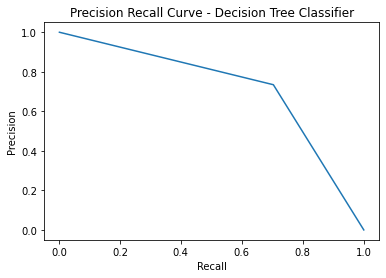

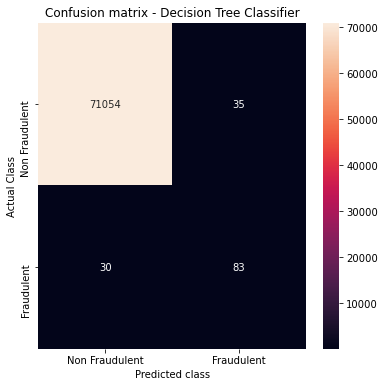

In [18]:
print("Decision Tree Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 